In [1]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

#Importing the data
df_credit = pd.read_csv("data/german_credit_data.csv",index_col=0)

## Data Processing

In [2]:
print(df_credit.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB
None


In [3]:
df_credit.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [4]:
#Looking unique values
print(df_credit.nunique())
#Looking the data
print(df_credit.head())

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64
   Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  Risk  
0         6             radio/TV  good  
1        48             radio/TV   bad  
2        12            education  good  
3        42  furniture/equipment  good  
4        24                  car   bad  


## Data Analysis

In [5]:
df_credit.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [6]:
df_credit.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [15]:
df_credit['Saving accounts'].describe()

count        817
unique         4
top       little
freq         603
Name: Saving accounts, dtype: object

In [20]:
df_credit['Saving accounts'].fillna('little', inplace=True)
df_credit

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [21]:
df_credit.to_csv('_german_credit_data.csv')

In [ ]:
df_credit['Saving accounts']=df_credit['Saving accounts']

good    700
bad     300
Name: Risk, dtype: int64


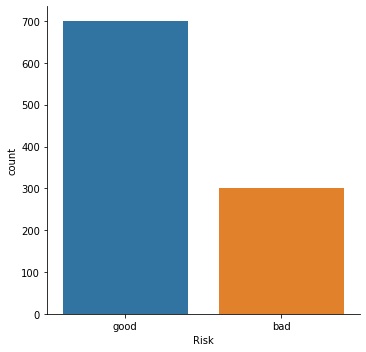

In [7]:
# import seaborn as sns
# import matplotlib.pyplot as plt
print(df_credit['Risk'].value_counts())
sns.catplot(x="Risk", kind="count", data=df_credit);
# sns.catplot(x="Risk", kind="count", palette="ch:.13", data=df_credit);

In [1]:
# Ploting Age Distribution
df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']

fig, ax = plt.subplots(nrows=2, figsize=(12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

g1 = sns.distplot(df_good["Age"], ax=ax[0], 
             color="g")
g1 = sns.distplot(df_bad["Age"], ax=ax[0], 
             color='r')
g1.set_title("Age", fontsize=15)
g1.set_xlabel("Age")
g1.set_xlabel("Frequency")

g2 = sns.countplot(x="Age",data=df_credit, 
              palette="hls", ax=ax[1], 
              hue = "Risk")
g2.set_title("Age Counting by Creditability", fontsize=15)
g2.set_xlabel("Age")
g2.set_xlabel("Count")
plt.show()

NameError: name 'df_credit' is not defined

### Data Analysis between "Credit amount" and "Age"

<Figure size 432x288 with 0 Axes>

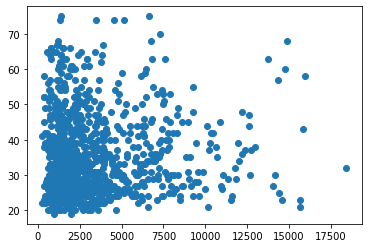

<Figure size 432x288 with 0 Axes>

In [9]:
plt.scatter(df_credit['Credit amount'],df_credit["Age"])
plt.figure()

In [10]:
import seaborn as sns

In [22]:
df_credit.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

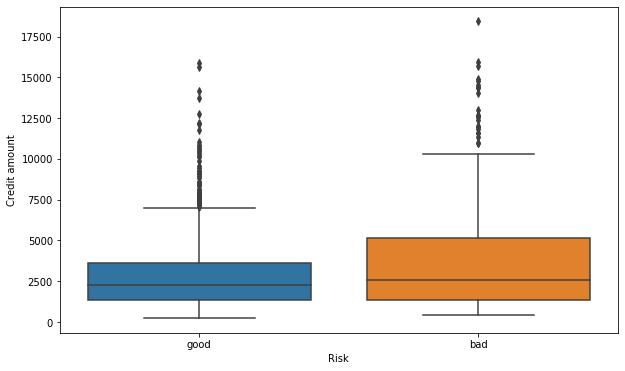

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Risk', y='Credit amount', data=df_credit)

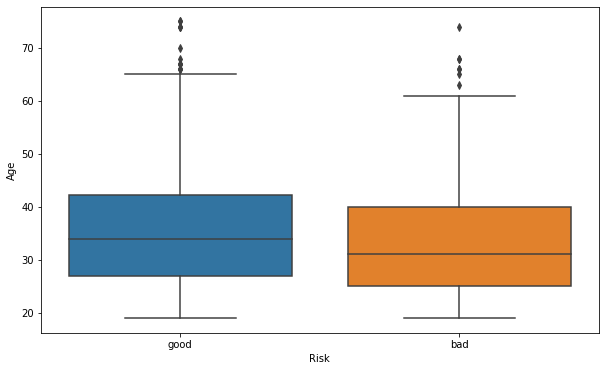

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Risk', y='Age', data=df_credit)

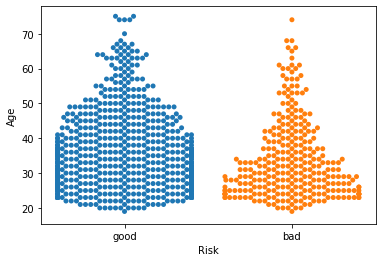

In [50]:
sns.swarmplot(x='Risk', y='Age', data=df_credit)

<Figure size 432x288 with 0 Axes>

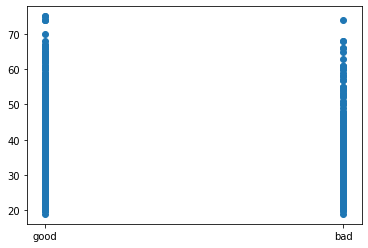

<Figure size 432x288 with 0 Axes>

In [49]:
plt.scatter(df_credit['Risk'],df_credit["Age"])
plt.figure()

### Data Analysis between "Credit amount" and "Duration"

<Figure size 432x288 with 0 Axes>

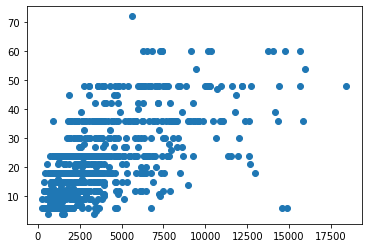

<Figure size 432x288 with 0 Axes>

In [12]:
plt.scatter(df_credit['Credit amount'],df_credit["Duration"])
plt.figure()

### Data Mapping

In [13]:
df_credit['Saving accounts'] = df_credit['Saving accounts'].map({"little":0,"moderate":1,"quite rich":2 ,"rich":3 });
df_credit['Saving accounts'] = df_credit['Saving accounts'].fillna(df_credit['Saving accounts'].dropna().mean())

df_credit['Checking account'] = df_credit['Checking account'].map({"little":0,"moderate":1,"rich":2 });
df_credit['Checking account'] = df_credit['Checking account'].fillna(df_credit['Checking account'].dropna().mean())

df_credit['Sex'] = df_credit['Sex'].map({"male":0,"female":1}).astype(float);

df_credit['Housing'] = df_credit['Housing'].map({"own":0,"free":1,"rent":2}).astype(float);

df_credit['Purpose'] = df_credit['Purpose'].map({'radio/TV':0, 'education':1, 'furniture/equipment':2, 'car':3, 'business':4,
       'domestic appliances':5, 'repairs':6, 'vacation/others':7}).astype(float);

### Data Analysis between "Saving accounts" and "Duration"

<Figure size 432x288 with 0 Axes>

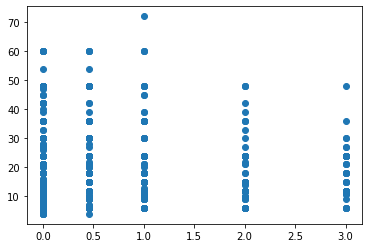

<Figure size 432x288 with 0 Axes>

In [14]:
plt.scatter(df_credit['Saving accounts'],df_credit["Duration"])
plt.figure()

<Figure size 432x288 with 0 Axes>

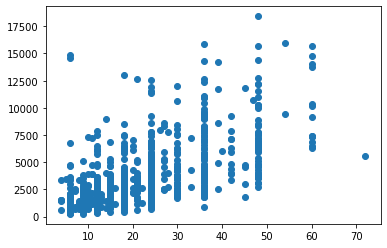

<Figure size 432x288 with 0 Axes>

In [45]:
plt.scatter(df_credit["Duration"],df_credit['Credit amount'])
plt.figure()

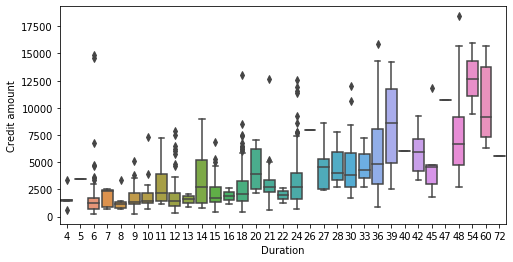

In [42]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Duration', y='Credit amount', data=df_credit)

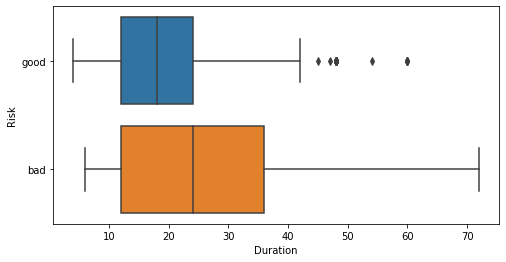

In [43]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Duration', y='Risk', data=df_credit)

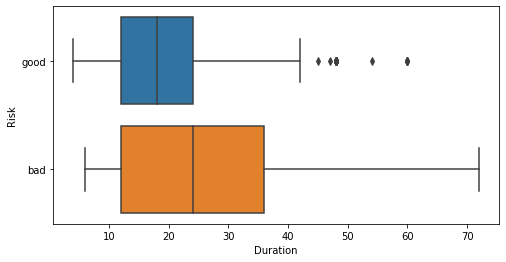

In [29]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Duration', y='Risk', data=df_credit)

<Figure size 432x288 with 0 Axes>

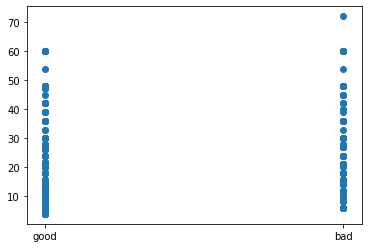

<Figure size 432x288 with 0 Axes>

In [31]:
plt.scatter(df_credit["Risk"],df_credit['Duration'])
plt.figure()

In [38]:
#Importing the data
_df_credit = pd.read_csv("data/german_credit_data.csv",index_col=0)

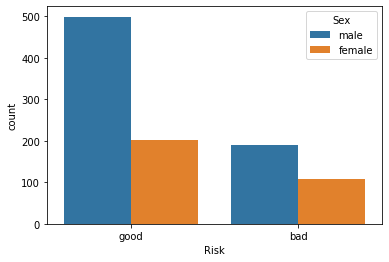

In [39]:
sns.countplot(data=_df_credit,x='Risk',hue='Sex')


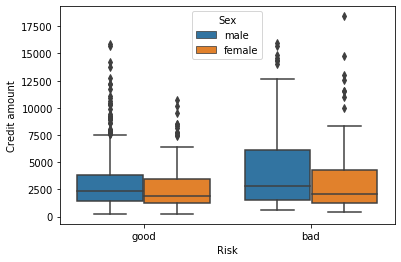

In [40]:
sns.boxplot(x='Risk', y='Credit amount', data=_df_credit,hue='Sex')

### Exploratory Data Analysis

In [15]:
df_credit

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,0.0,2,0.0,0.456548,0.000000,1169,6,0.0,good
1,22,1.0,2,0.0,0.000000,1.000000,5951,48,0.0,bad
2,49,0.0,1,0.0,0.000000,0.651815,2096,12,1.0,good
3,45,0.0,2,1.0,0.000000,0.000000,7882,42,2.0,good
4,53,0.0,2,1.0,0.000000,0.000000,4870,24,3.0,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,1.0,1,0.0,0.000000,0.651815,1736,12,2.0,good
996,40,0.0,3,0.0,0.000000,0.000000,3857,30,3.0,good
997,38,0.0,2,0.0,0.000000,0.651815,804,12,0.0,good
998,23,0.0,2,1.0,0.000000,0.000000,1845,45,0.0,bad


### Pairwise Analysis

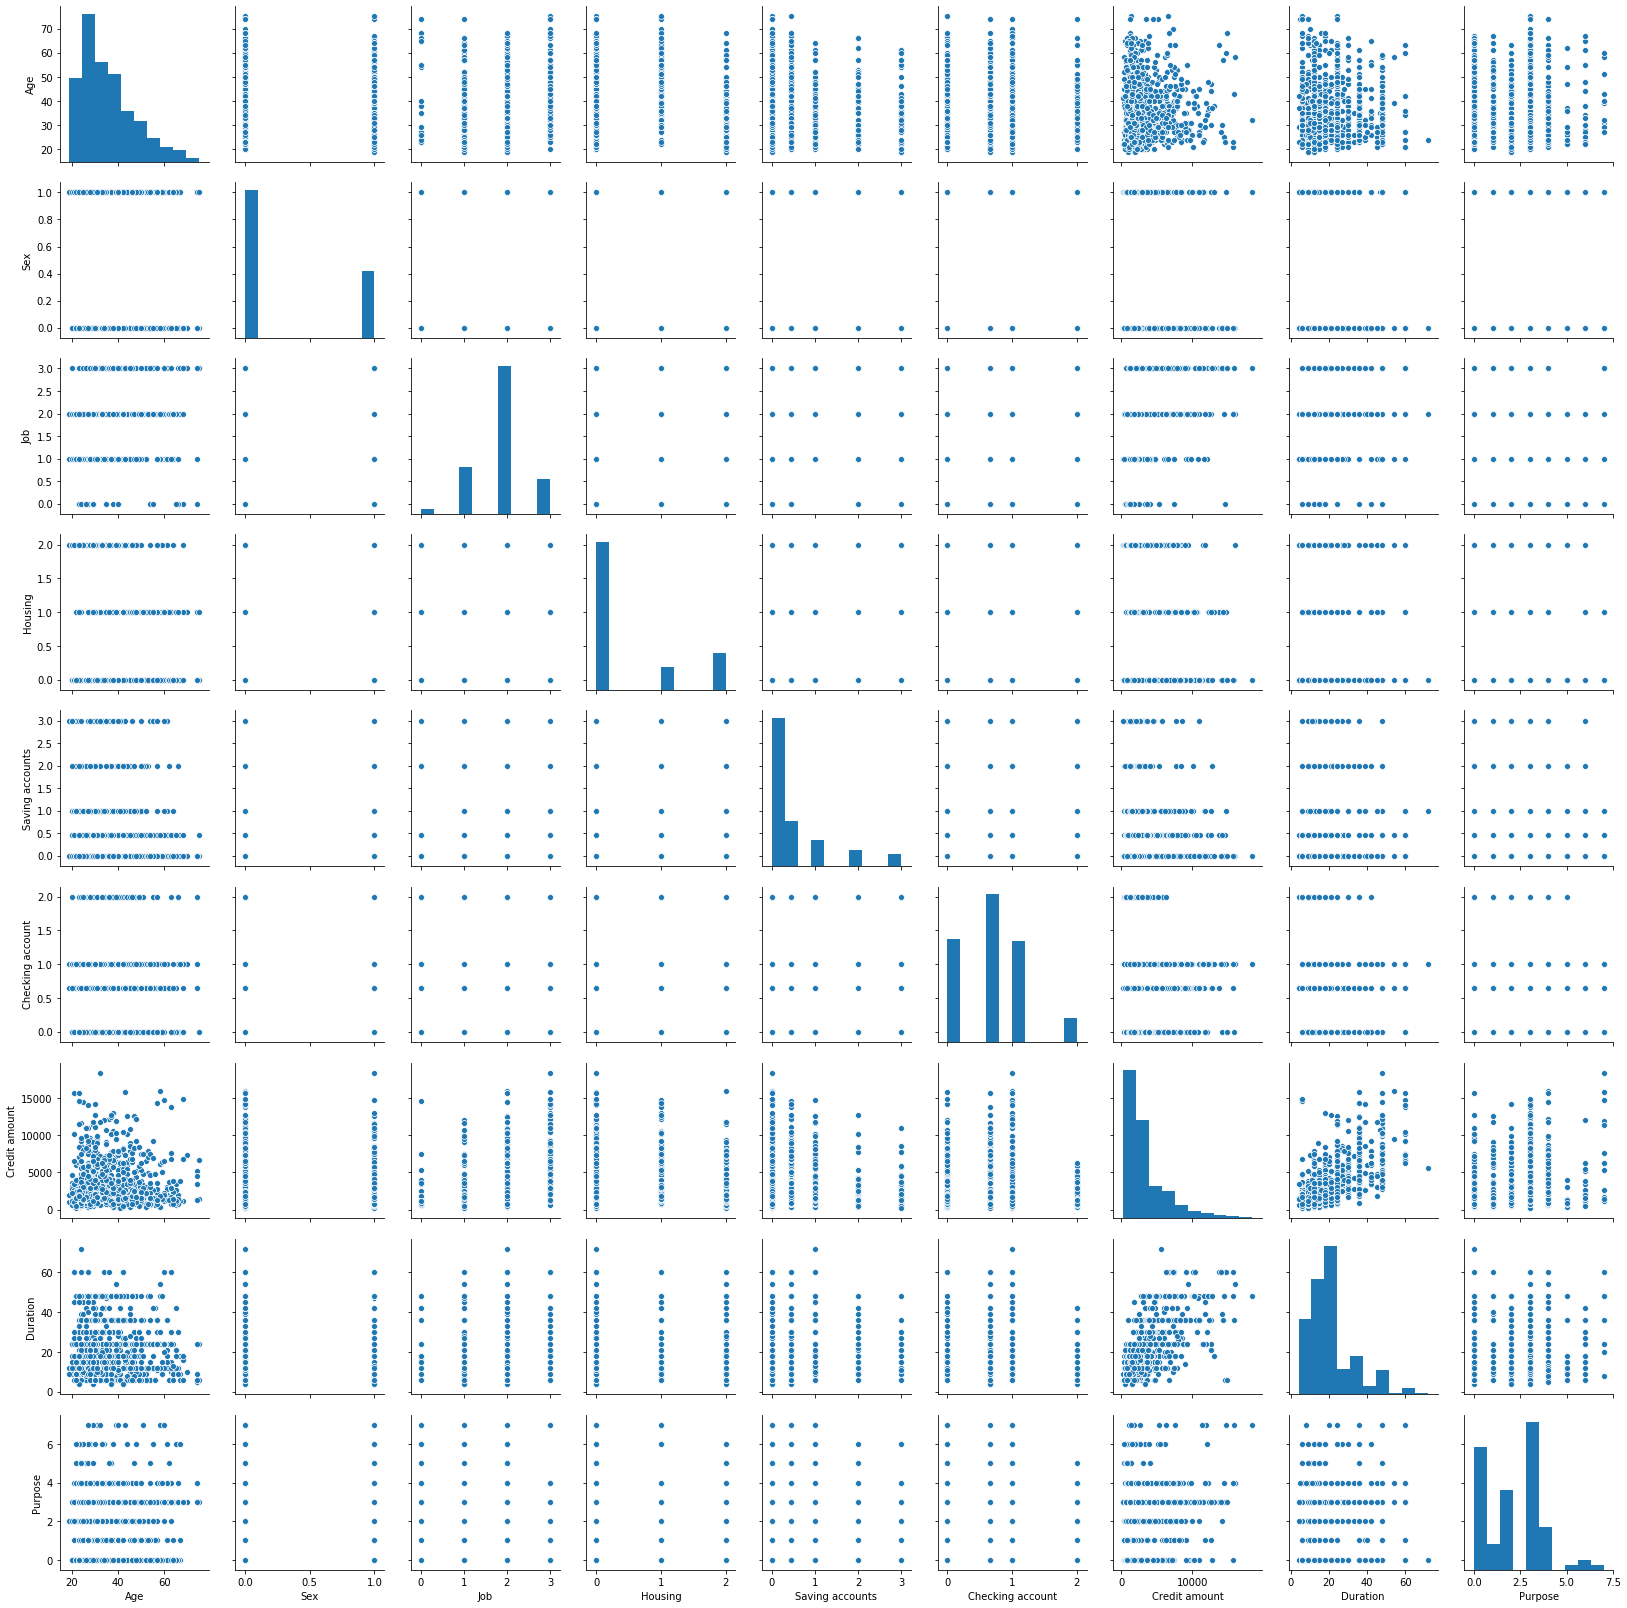

In [16]:
sns.pairplot(df_credit)

In [17]:
X = df_credit.drop(['Risk'], axis = 1)

In [18]:
y =df_credit['Risk'].map({'good':1,'bad':0}).astype(float);

In [19]:
y

0      1.0
1      0.0
2      1.0
3      1.0
4      0.0
      ... 
995    1.0
996    1.0
997    1.0
998    0.0
999    1.0
Name: Risk, Length: 1000, dtype: float64

### MultiVariate Analysis - Heat Map

Text(0.5, 1, 'Correlation between features')

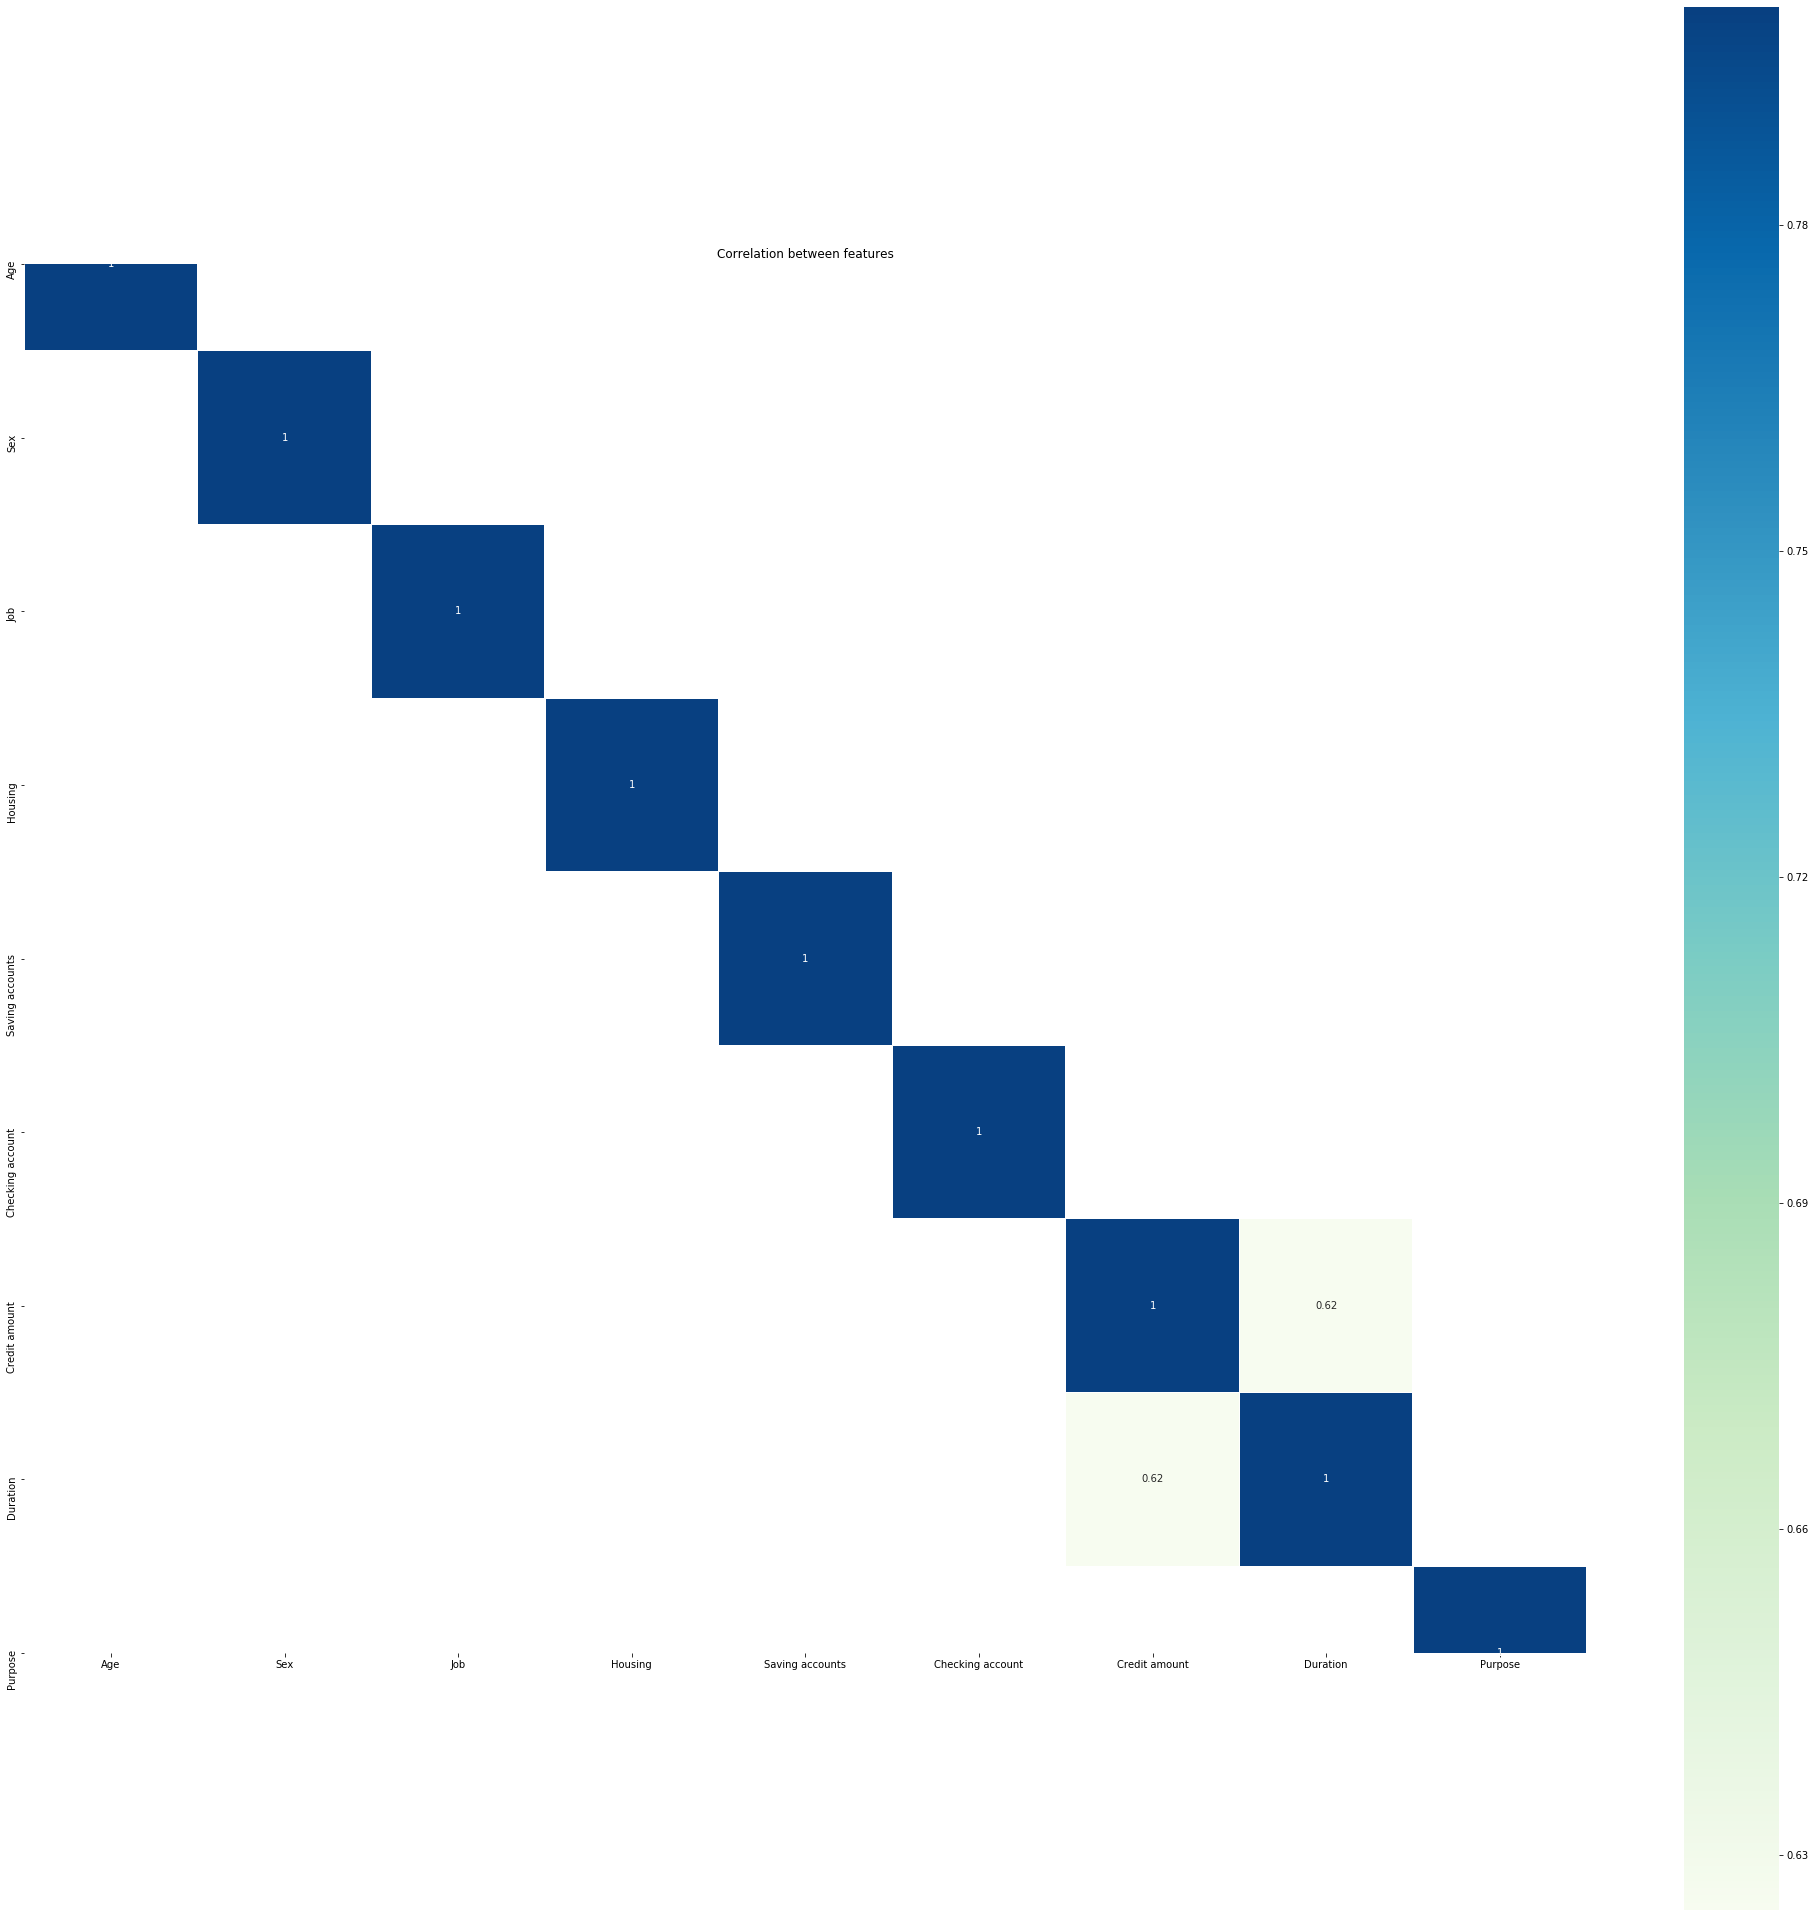

In [52]:
# Checking Correlation and correlation plot
import matplotlib.pyplot as plt
import seaborn as sns
corr=df_credit.corr()
plt.figure(figsize=(35, 35))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='GnBu',linecolor="white")
plt.title('Correlation between features')

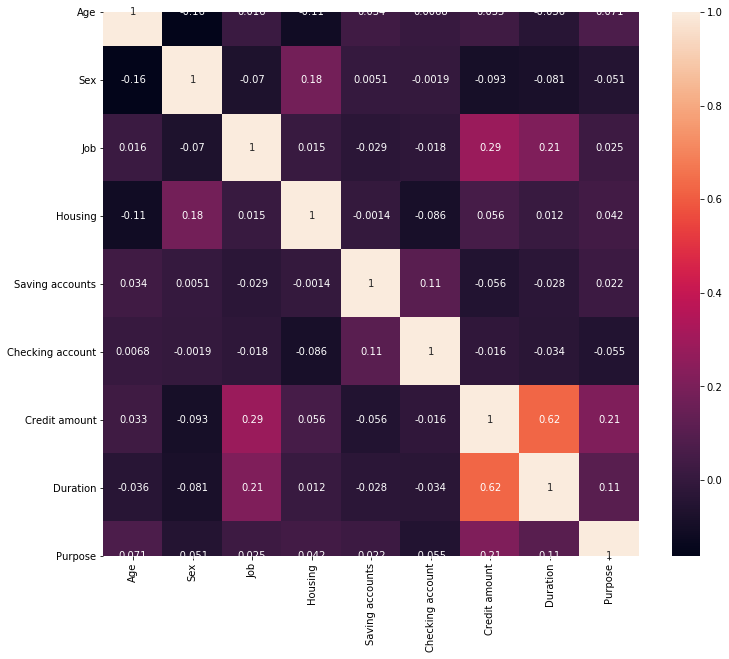

In [20]:
plt.figure(figsize=(12,10))
sns.heatmap(X.astype(float).corr(), annot=True)
plt.show()

In [21]:
https://www.kaggle.com/kabure/predicting-credit-risk-model-pipeline

SyntaxError: invalid syntax (<ipython-input-21-fcae3d3c0aa1>, line 1)

In [ ]:
https://www.kaggle.com/kabure/kernels

In [ ]:
https://www.kaggle.com/kabure/extensive-eda-and-modeling-xgb-hyperopt

In [ ]:
https://www.kaggle.com/kabure/credit-card-fraud-prediction-rf-smote

In [ ]:
https://www.kaggle.com/quinn126/predicting-german-credit-risk-logit-reg-xgboost

In [ ]:
https://www.kaggle.com/uciml/german-credit/kernels?sortBy=voteCount&group=everyone&pageSize=20&datasetId=531&language=Python

In [ ]:
https://www.kaggle.com/neelesh1121/credit-card-risk-dataset-analysis-and-best-model

In [ ]:
https://www.kaggle.com/kabure/predicting-credit-risk-model-pipeline

In [ ]:
https://www.kaggle.com/uciml/german-credit/kernels

In [ ]:
https://www.kaggle.com/vigneshj6/german-credit-data-analysis-python

In [ ]:
http://localhost:8888/notebooks/Documents/Workspace_ML_AI/DS_Class/Imarticus%20student/Student%20DataScience/German%20Credit%20Data.ipynb

In [22]:
df = pd.DataFrame({ 'Col1' : [1,2,3,np.NaN],'Col2' : [8,9,7,10]})  

df2 = df.apply(lambda x: x['Col2'] if pd.isnull(x['Col1']) else x['Col1'], axis=1)

In [23]:
df

,Col1,Col2
0,1.0,8
1,2.0,9
2,3.0,7
3,NaN,10
